# Final Project: Pennsylvania Overdose Data Analysis
## Rebecca Robb
This project is done with the file: 
Overdose_Information_Network_Data_CY_January_2018_-_Current_Monthly_County_State_Police.csv
which was last updated in March of 2021. 

### Importing the data frame and removed unnneccessary features.

In [71]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from random import shuffle
import random
random.seed(123)

#import data frame
df = pd.read_csv('Overdose_Information_Network_Data_CY_January_2018_-_Current_Monthly_County_State_Police.csv')

print(df.info())

#remove unneccessary data
df = df.drop(['Incident Date','Incident Time', 'Incident County Name','Response Time Desc', 'Revive Action Desc', 'Response Desc', 'Victim County', 
               'Victim OD Drug ID', 'Third Party Admin Desc', 'Administration ID', 'Dose Count', 'Dose Unit', 
               'Dose Desc', 'Incident ID', 'Victim State', 'Incident State', 'Victim County Latitude and Longitude',
               'Incident County Latitude and Longitude', 'Victim ID', 'Victim County FIPS Code', 
               'Incident County FIPS Code', 'Victim County Latitude', 'Victim County Longitude'], axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25173 entries, 0 to 25172
Data columns (total 34 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Incident ID                             25173 non-null  int64  
 1   Incident Date                           25173 non-null  object 
 2   Incident Time                           25173 non-null  object 
 3   Day                                     25173 non-null  object 
 4   Incident County Name                    25173 non-null  object 
 5   Incident State                          25173 non-null  object 
 6   Victim ID                               25173 non-null  int64  
 7   Gender Desc                             25173 non-null  object 
 8   Age Range                               25173 non-null  object 
 9   Race                                    25173 non-null  object 
 10  Ethnicity Desc                          25173 non-null  ob

### Check for missing values

In [3]:
#check missing values
print(df.isnull().sum()) 
print("\n Result: There are missing values for Victim State, Victim County, " +
      "Dose Desc, Response Time Desc, Response Desc, Revive Action Desc, Third Party Admin Desc, and Victim County FIPS Code \n")


Day                          0
Gender Desc                  0
Age Range                    0
Race                         0
Ethnicity Desc               0
Accidental Exposure          0
Susp OD Drug Desc            0
Naloxone Administered        0
Survive                      0
Incident County Latitude     0
Incident County Longitude    0
dtype: int64

 Result: There are missing values for Victim State, Victim County, Dose Desc, Response Time Desc, Response Desc, Revive Action Desc, Third Party Admin Desc, and Victim County FIPS Code 



### Check to see if data is balanced and plot to visualize on Bar and Pie Chart

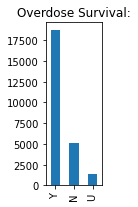

 Survived (Y) and Died (N) and Unknown (U))


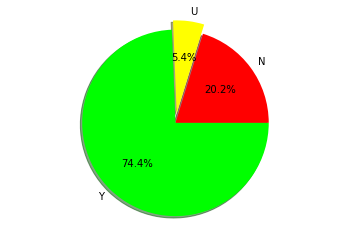


 Result: survival data is not balanced



In [48]:
#check to see if df is balanced
df['Survive'].value_counts().plot(kind = 'bar', figsize = (1, 3))
plt.title('Overdose Survival:')
plt.show
plt.show(block=False)
print(' Survived (Y) and Died (N) and Unknown (U))')

survive = df.groupby(['Survive']).groups.keys()
survive_counts = df['Survive'].value_counts(sort=False)
df_survive = pd.DataFrame(survive_counts, survive)
total_survive = df_survive['Survive'].sum()
survival_rates = df_survive['Survive']

fig1, ax1 = plt.subplots()
ax1.pie([(x / total_survive) * 100 for x in survival_rates],
        labels=survive,
        explode=[0, 0.1, 0],
        autopct='%1.1f%%',
        colors = ['red', 'yellow', 'lime'],
        shadow=True)
ax1.axis('equal')

plt.show()
print("\n Result: survival data is not balanced\n")

### Visualzing Gender Feature

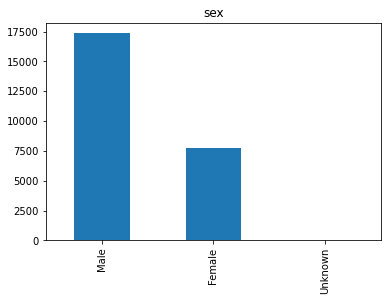

In [49]:
df['Gender Desc'].value_counts().plot(kind = 'bar', figsize = (6, 4))
plt.title('sex')
plt.show
plt.show(block=False)

### Removing Unknown Variable in Survive and Visualizing

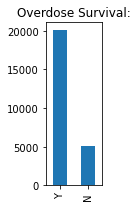

 Survived (Y) and Died (N)


In [72]:
df['Survive'] = df['Survive'].replace(to_replace=r'U', value='Y')

df['Survive'].value_counts().plot(kind = 'bar', figsize = (1, 3))
plt.title('Overdose Survival:')
plt.show
plt.show(block=False)
print(' Survived (Y) and Died (N)')

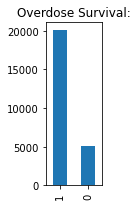

 Survived (1) and Died (0)


In [73]:
df['Survive'] = df['Survive'].replace(to_replace=r'Y', value=1)
df['Survive'] = df['Survive'].replace(to_replace=r'N', value=0)
df['Survive'].value_counts().plot(kind = 'bar', figsize = (1, 3))
plt.title('Overdose Survival:')
plt.show
plt.show(block=False)
print(' Survived (1) and Died (0)')

### Visualizing the suspected drug causing OD

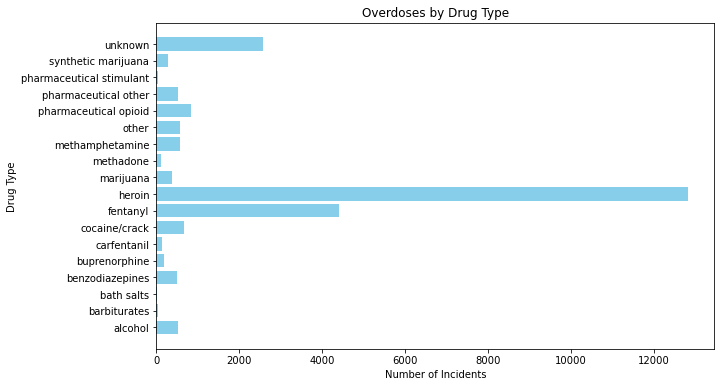

In [74]:
df['Susp OD Drug Desc'] = df['Susp OD Drug Desc'].str.lower()
df['Susp OD Drug Desc'] = df['Susp OD Drug Desc'].replace(to_replace=r'benzodiazepines (i.e.valium, xanax, ativan, etc)', value='benzodiazepines')
df['Susp OD Drug Desc'] = df['Susp OD Drug Desc'].replace(to_replace=r'buprenorphine (i.e. suboxone, sublocade, subutex, butrans, buprenex, etc)', value='buprenorphine')
df['Susp OD Drug Desc'] = df['Susp OD Drug Desc'].replace(to_replace=r'barbiturates (i.e. amytal, nembutal, etc)', value='barbiturates')
df['Susp OD Drug Desc'] = df['Susp OD Drug Desc'].replace(to_replace=r'fentanyl analog/other synthetic opioid', value='fentanyl')
df['Susp OD Drug Desc'] = df['Susp OD Drug Desc'].astype('category')
drug_types = df.groupby(['Susp OD Drug Desc']).groups.keys()
drug_counts = df['Susp OD Drug Desc'].value_counts(sort=False)
df_drugs = pd.DataFrame(drug_counts, drug_types)
df_drugs = df_drugs.rename(columns={"Susp OD Drug Desc": "Count"})
df_drugs = df_drugs.sort_values(by="Count", ascending=False)
keys = list(drug_types)
counts = list(drug_counts)

fig = plt.figure(figsize = (10, 6))
plt.barh(keys, counts, color ='skyblue') 
  
plt.ylabel("Drug Type") 
plt.xlabel("Number of Incidents") 
plt.title("Overdoses by Drug Type") 
plt.show()

### Visualzing Race Feature

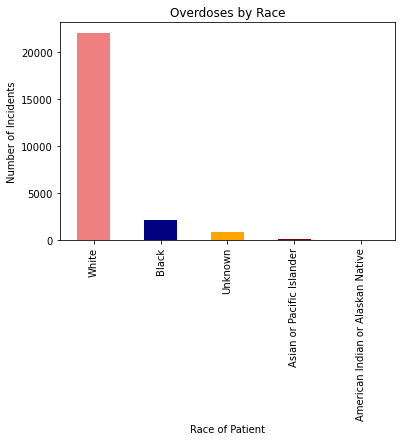

In [43]:
df['Race'].value_counts().plot(kind = 'bar', figsize = (6, 4), color=['lightcoral', 'navy', 'orange', 'maroon', 'yellow'])
plt.xlabel("Race of Patient") 
plt.ylabel("Number of Incidents")
plt.title('Overdoses by Race')
plt.show
plt.show(block=False)

### Visualizing ODs by Day

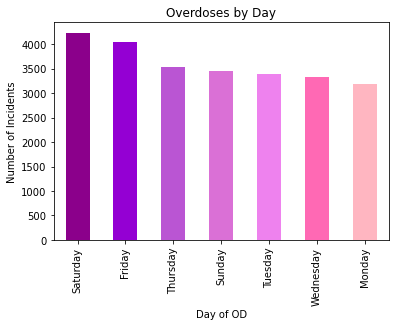

In [37]:
df['Day'].value_counts().plot(kind = 'bar', figsize = (6, 4), color=['darkmagenta', 'darkviolet', 'mediumorchid', 'orchid', 'violet', 'hotpink', 'lightpink'])
plt.xlabel("Day of OD") 
plt.ylabel("Number of Incidents")
plt.title('Overdoses by Day')
plt.show
plt.show(block=False)

### Plotting the Locations

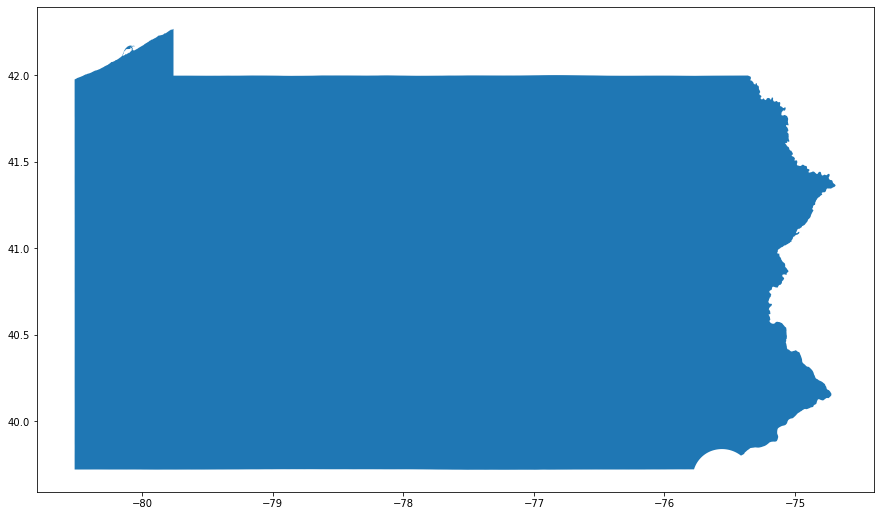

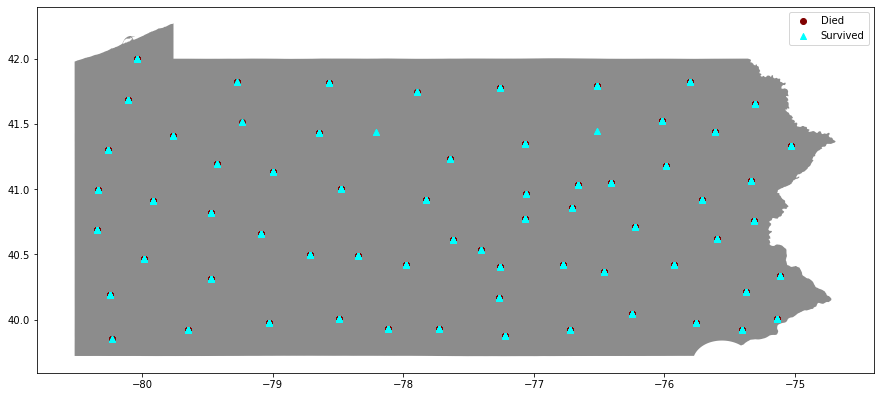

In [96]:
street_map = gpd.read_file('STATE_BOUNDARY.shp')
gif,ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax = ax)
crs = {"init" : "epsg:4326"}
df.head()
type(df)
#geometry = [Point(xy) for xy in zip(df["Incident County Longitude"], df["Incident County Latitude"])]
#geometry[:3]
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df["Incident County Longitude"], df["Incident County Latitude"]))
gdf.head()
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.9, color = "grey")
gdf[gdf['Survive'] == 0].plot(ax = ax, color = "maroon", marker = "o", label = "Died")
gdf[gdf['Survive'] == 1].plot(ax = ax, color = "cyan", marker = "^", label = "Survived")
plt.legend(prop={'size':10})


### Visualizing Overdoses by Age

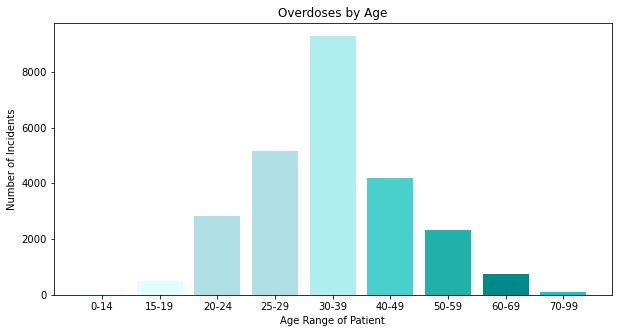

In [26]:
#df['Age Range'].value_counts().plot(kind = 'bar', figsize = (6, 4), color=['cyan', 'lime', 'maroon', 'pink', 'green', 'blue', 'yellow', 'purple', 'red'])
df['Age Range'] = df['Age Range'].replace(to_replace=r'\s\-\s', value='-', regex=True)
df['Age Range'] = df['Age Range'].replace(to_replace=r'14-Oct', value='0-14')
df['Age Range'] = df['Age Range'].replace(to_replace=r'0-9', value='0-14')
df['Age Range'] = df['Age Range'].replace(to_replace=r'70-79', value='70-99')
df['Age Range'] = df['Age Range'].replace(to_replace=r'80-*', value='70-99')
df['Age Range'] = df['Age Range'].astype('category')


age_range = df.groupby(['Age Range']).groups.keys()
age_counts = df['Age Range'].value_counts(sort=False)
df_age = pd.DataFrame(age_counts, age_range)
df_age = df_age.reset_index()
df_age = df_age.rename(columns={"Age Range": "Count", "index": "Age Range"})


keys = list(df_age['Age Range'])
counts = list(df_age['Count'])

fig = plt.figure(figsize = (10, 5))
plt.bar(keys, counts, color=['azure', 'lightcyan', 'powderblue', 'powderblue', 'paleturquoise', 'mediumturquoise', 'lightseagreen', 'darkcyan', 'darkturquoise', 'darkslategrey']) 
  
plt.xlabel("Age Range of Patient") 
plt.ylabel("Number of Incidents") 
plt.title("Overdoses by Age") 
plt.show()

### Reformating categorical features

In [11]:
#check categorical values
print(df.info())
print("\n Result: Many categorical values going to use label enconding to convert to integer values\n")

print(df["Day"].value_counts())

labelencoder = LabelEncoder()

df["Day"] = labelencoder.fit_transform(df["Day"])
print(df["Day"].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25173 entries, 0 to 25172
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Day                        25173 non-null  object 
 1   Gender Desc                25173 non-null  object 
 2   Age Range                  25173 non-null  object 
 3   Race                       25173 non-null  object 
 4   Ethnicity Desc             25173 non-null  object 
 5   Accidental Exposure        25173 non-null  object 
 6   Susp OD Drug Desc          25173 non-null  object 
 7   Naloxone Administered      25173 non-null  object 
 8   Survive                    25173 non-null  object 
 9   Incident County Latitude   25173 non-null  float64
 10  Incident County Longitude  25173 non-null  float64
dtypes: float64(2), object(9)
memory usage: 2.1+ MB
None

 Result: Many categorical values going to use label enconding to convert to integer values

Saturday     

In [68]:
print(df["Gender Desc"].value_counts())
df["Gender Desc"] = labelencoder.fit_transform(df["Gender Desc"])
print(df["Gender Desc"].value_counts())

Male       17346
Female      7773
Unknown       54
Name: Gender Desc, dtype: int64
1    17346
0     7773
2       54
Name: Gender Desc, dtype: int64


In [12]:
print(df["Age Range"].value_counts())

df['Age Range'] = df['Age Range'].replace(to_replace=r'14-Oct', value='0 - 14')
df['Age Range'] = df['Age Range'].replace(to_replace=r'0 - 9', value='0 - 14')
df['Age Range'] = df['Age Range'].replace(to_replace=r'70 - 79', value='70 - 99')
df['Age Range'] = df['Age Range'].replace(to_replace=r'80 - *', value='70 - 99')

print(df["Age Range"].value_counts())

df["Age Range"] = labelencoder.fit_transform(df["Age Range"])
print(df["Age Range"].value_counts())

30 - 39    9285
25 - 29    5143
40 - 49    4202
20 - 24    2809
50 - 59    2331
60 - 69     731
15 - 19     502
70 - 99      89
0 - 14       81
Name: Age Range, dtype: int64
30 - 39    9285
25 - 29    5143
40 - 49    4202
20 - 24    2809
50 - 59    2331
60 - 69     731
15 - 19     502
70 - 99      89
0 - 14       81
Name: Age Range, dtype: int64
4    9285
3    5143
5    4202
2    2809
6    2331
7     731
1     502
8      89
0      81
Name: Age Range, dtype: int64


In [70]:
print(df["Race"].value_counts())
df["Race"] = labelencoder.fit_transform(df["Race"])
print(df["Race"].value_counts())

White                                22032
Black                                 2160
Unknown                                884
Asian or Pacific Islander               88
American Indian or Alaskan Native        9
Name: Race, dtype: int64
4    22032
2     2160
3      884
1       88
0        9
Name: Race, dtype: int64


In [71]:
print(df["Ethnicity Desc"].value_counts())
df["Ethnicity Desc"] = labelencoder.fit_transform(df["Ethnicity Desc"])
print(df["Ethnicity Desc"].value_counts())

Not Hispanic    21120
Unknown          2603
Hispanic         1423
Mongolian          27
Name: Ethnicity Desc, dtype: int64
2    21120
3     2603
0     1423
1       27
Name: Ethnicity Desc, dtype: int64


In [72]:
print(df["Accidental Exposure"].value_counts())
df["Accidental Exposure"] = labelencoder.fit_transform(df["Accidental Exposure"])
print(df["Accidental Exposure"].value_counts())

N    25146
Y       27
Name: Accidental Exposure, dtype: int64
0    25146
1       27
Name: Accidental Exposure, dtype: int64


In [73]:
print(df["Susp OD Drug Desc"].value_counts())
df["Susp OD Drug Desc"] = labelencoder.fit_transform(df["Susp OD Drug Desc"])
print(df["Susp OD Drug Desc"].value_counts())

HEROIN                                                                       12809
FENTANYL                                                                      3811
UNKNOWN                                                                       2560
PHARMACEUTICAL OPIOID                                                          847
COCAINE/CRACK                                                                  661
FENTANYL ANALOG/OTHER SYNTHETIC OPIOID                                         604
METHAMPHETAMINE                                                                577
OTHER                                                                          576
ALCOHOL                                                                        520
PHARMACEUTICAL OTHER                                                           511
BENZODIAZEPINES (I.E.VALIUM, XANAX, ATIVAN, ETC)                               509
MARIJUANA                                                                      370
SYNT

In [74]:
print(df["Naloxone Administered"].value_counts())
df["Naloxone Administered"] = labelencoder.fit_transform(df["Naloxone Administered"])
print(df["Naloxone Administered"].value_counts())

Y    16558
N     8615
Name: Naloxone Administered, dtype: int64
1    16558
0     8615
Name: Naloxone Administered, dtype: int64


In [75]:
df['Survive'] = df['Survive'].replace(to_replace=r'U', value='Y')
print(df["Survive"].value_counts())
df["Survive"] = labelencoder.fit_transform(df["Survive"])
print(df["Survive"].value_counts())

Y    20078
N     5095
Name: Survive, dtype: int64
1    20078
0     5095
Name: Survive, dtype: int64


### Splitting the data into training and testing sets and normalizing features

In [80]:
X = df.drop('Survive', axis=1).values
y = df['Survive'].values

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

print("train_val: {}, test: {}".format(X_train_val.shape[0], X_test.shape[0]))

normalizer = StandardScaler()
X_train_val = normalizer.fit_transform(X_train_val)
X_test = normalizer.transform(X_test)

train_val: 21900, test: 3273
